# CSCE 623 Homework Assignment 5

## Multiclassification and Error Analysis

## Instructions

***Important Note: Full effort assignments must have robust error analysis. Incomplete error analysis will result in a score reduction.***

In this assignment, you will:

- conduct multi-classification on MNIST using Decision Trees
- experiment with feature reduction to improve your model
- conduct error analysis on your chosen model

A demo has been provided for your use: [Multi-class Demo](https://colab.research.google.com/github/afit-csce623-master/demos/blob/main/demo_multiclassification.ipynb)

### STEP 1

Without doing any feature reduction, use a Decision Tree Classifier on the MNIST dataset. Report your cross validation metric and score (the default metric is accuracy for classification problems) along with the parameters you used for your Decision Tree function. You may experiment with different Decision Tree Classification parameters, but report the metrics for only one model. Answer the questions in the [STEP 1 Discussion](https://colab.research.google.com/github/afit-csce623-master/template-hw5/blob/main/hw5.ipynb#) text box below.


### STEP 2

Use either/both Principal Component Analysis or/and Histogram of Oriented Gradients to reduce your image features. Experiment with different hyperparameters until you have a model that performs better than the model you reported in STEP 1 (accuracy mean is at least two times more than the mean CV accuracy in STEP 1 plus two times the CV standard deviation). You may explore as many models as you like, but you'll report the metrics only for one model in this step. Answer the questions in the [STEP 2 Discussion](https://colab.research.google.com/github/afit-csce623-master/template-hw5/blob/main/hw5.ipynb#) text box below. 

In STEP 1, you must use a Decision Tree, but in this step you may use any of the following:

- [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html)
- More than likely, any other algorithm available in scikit-learn except neural networks


### STEP 3

Read _HOML_ pages 100-105. Conduct error analysis on your final model you discussed in STEP 2. For full effort credit you must:
- Present an image representation of a multi-classification confusion matrix, normalized for the number of images in each class (you may optionally zero-out the diagonal as in the book or leave it alone).
- Discuss patterns of confusion (see STEP 3 Discussion text box below)
- Analyze at least one pair of individual classification errors you identified as patterns. For example, if 3s and 8s are often confused, you should display a sample of 3s and 8s which are each classified correctly and which are confused with one another. Discuss what you see (see STEP 3 Discussion text box below)
- What would be your next step to improve your model (see STEP 3 Discussion text box below)?

### BONUS STEP

Implement a naive classifier that doesn't use machine learning. This is an example of a ["Never 5" classifier](https://colab.research.google.com/github/afit-csce623-master/handson-ml/blob/master/03_classification.ipynb#scrollTo=RD9c1KKXU72w&line=5&uniqifier=1) in a binary classification task to detect 5s. Can you do better than 25% with a naive classifier? Include code with your cross validation error.

## Hints

- Do not dwell for extended periods of time attempting to get a slightly better model. Be sure you allow enough time to conduct error analysis on your final model.
- Refer to [this notebook cell](https://colab.research.google.com/github/afit-csce623-master/handson-ml/blob/master/03_classification.ipynb#scrollTo=hd53zSo-U728&line=2&uniqifier=1) and following for sample code to generate error analysis plots.
- Use small values for your k-fold in cross validation and other values that are easy to fit while testing your code. Just a few parameters can take a long to to grid search. Explore [the halving grid searches referenced on scikit-learn's user guide](https://scikit-learn.org/stable/modules/grid_search.html#grid-search).
- You may also find it helpful to further reduce the size of your training set while testing your code until you are satisfied with your syntax and a reasonable range of hyperparameters to search.

# Student Answers

## STEP 1 Discussion

- What were the cross validation metric and score for the Decision Tree Classifier you created? What were the Decision Tree parameters? Be sure you have code in your notebook supporting this answer.

  <font color="green">Student Answer</font>

- What do you think you can do to improve your model's performance? Why do you think it will help?

  <font color="green">Student Answer</font>

- How many features does each image have? How did you calculate that number?

  <font color="green">Student Answer</font>


## STEP 2 Discussion

- How many features does each image have using your feature reduction technique? What was your feature reduction process, and what were the parameters for each algorithm you used? Be sure you have code in your notebook supporting this answer.

  <font color="green">Student Answer</font>

- What were the cross validation metric and score for the Decision Tree Classifier you created using feature reduction? What were the Decision Tree parameters? Be sure you have code in your notebook supporting this answer.

  <font color="green">Student Answer</font>

- Feature reduction reduces the number of features used to represent an observation. In many cases, the feature reduction process blurs the distintives of an observation. Why then did feature reduction improve the model score?

  <font color="green">Student Answer</font>

- Under what circumstances is feature reduction not likely to improve a model's performance?

  <font color="green">Student Answer</font>




## STEP 3 Discussion

- What patterns of confusion do you observe in your multi-classification confusion matrix? Be sure you have code in your notebook supporting this answer.

  <font color="green">Student Answer</font>

- Analyze a pair of classes that are frequently confused. Discuss. Be sure you have code in your notebook supporting this answer.

  <font color="green">Student Answer</font>

- What would your next steps be to try and improve your model?

  <font color="green">Student Answer</font>




## BONUS STEP Discussion

- Describe your naive classifier. How does it work?

  <font color="green">Student Answer</font>

- What is the cross-validation error for your naive classifier? If your naive classifier is not a random guess classifier, how does the performance of your classifier compare to random guessing, assuming balanced classes? How does you model from STEP 2 compare to your naive classifier?

  <font color="green">Student Answer</font>

# Implementation

In [3]:
from keras.datasets import mnist
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog

import cv2

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


[5 0 4 ... 5 6 8]


In [13]:
# display images with labels in a nrows x ncols grid starting with the index image in the X dataset
def plot_figures(nrows, ncols, X, y, labels, cmap=None, start=0):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*2 + (ncols-1)/2, nrows*2 + (nrows+1)/2))
    index = start
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].set_title(f'{index} {y[index]}')
            axes[i,j].imshow(X[index], cmap)
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
    plt.show()

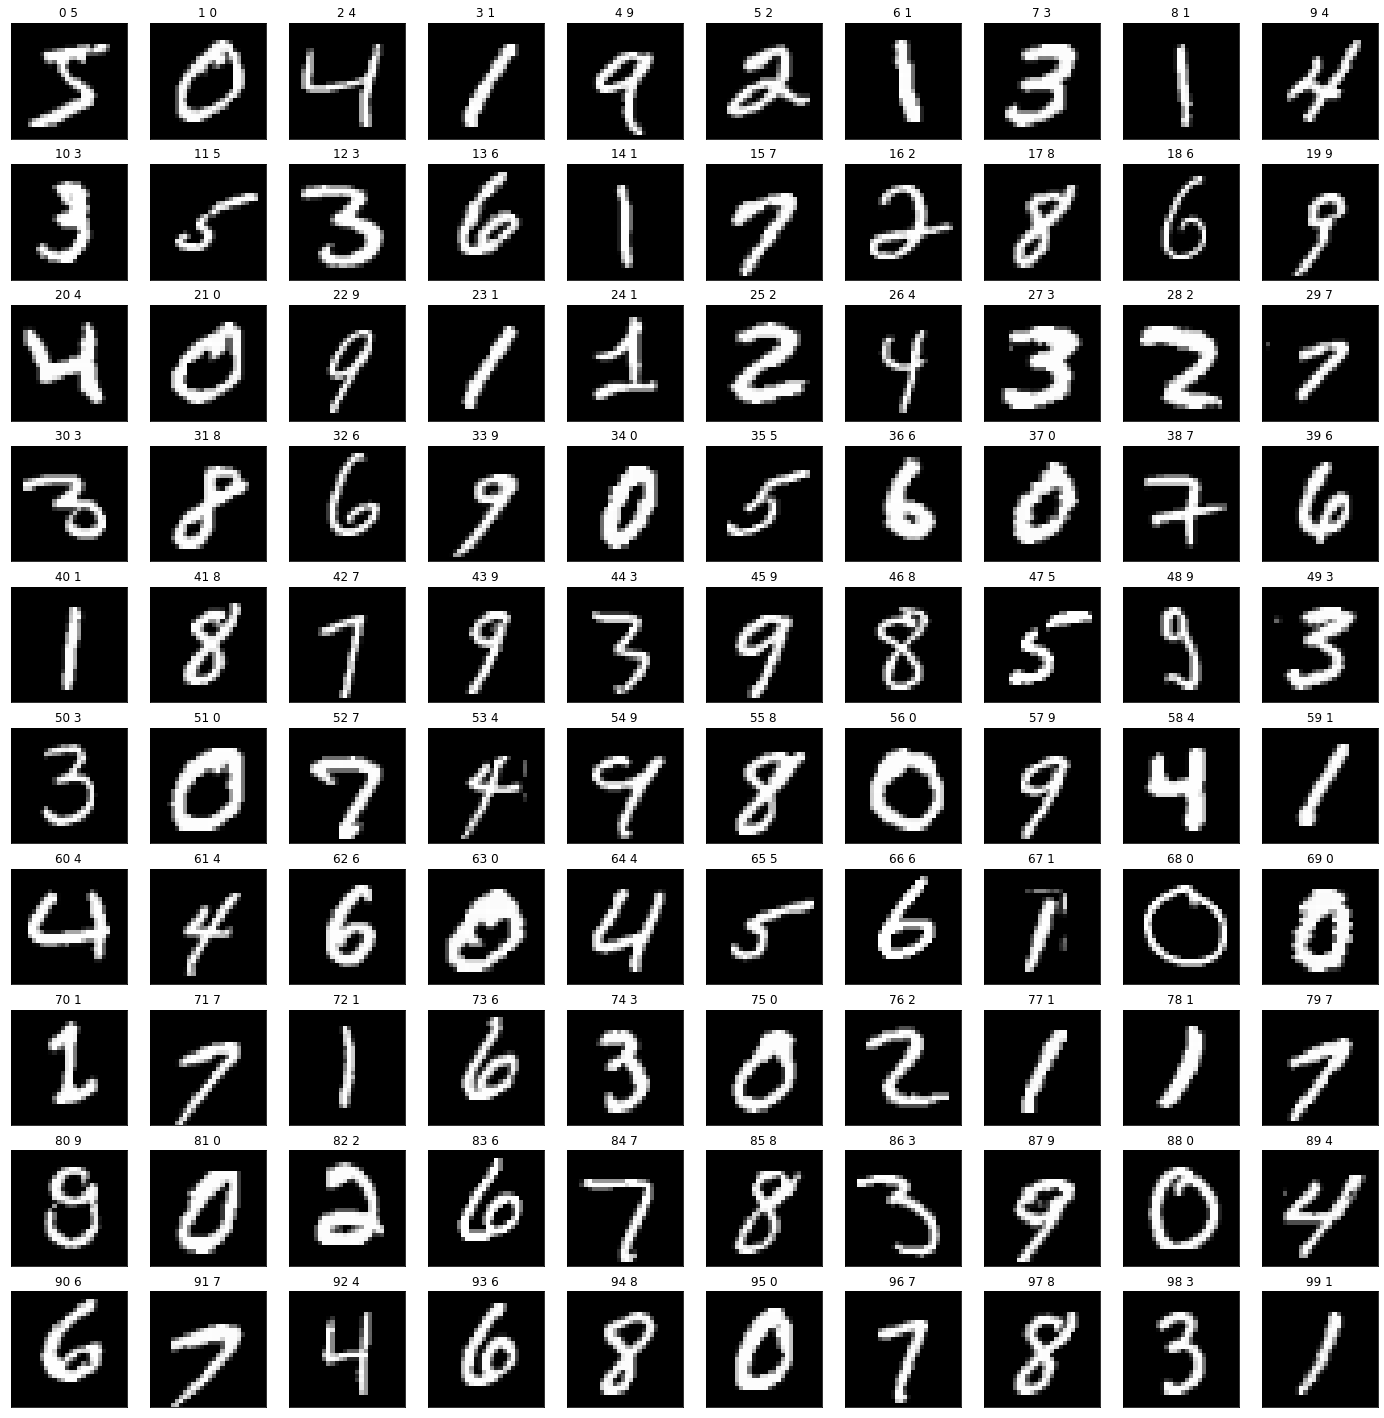

In [14]:
plot_figures(10, 10, X_train, y_train, y_train, cmap='gray')